Assignment 3 - Stock Price Prediction

Pablo Nicolas Blanco a1609603

Deep Learning Fundamentals

In [1]:
from google.colab import files

files.upload() # upload the Google_Stock_Price_Train.csv file upon prompt
files.upload() # upload the Google_Stock_Price_Test.csv file upon prompt

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


{'Google_Stock_Price_Test.csv': b'Date,Open,High,Low,Close,Volume\r\n1/3/2017,778.81,789.63,775.8,786.14,"1,657,300"\r\n1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"\r\n1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"\r\n1/6/2017,795.26,807.9,792.2,806.15,"1,640,200"\r\n1/9/2017,806.4,809.97,802.83,806.65,"1,272,400"\r\n1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"\r\n1/11/2017,805,808.15,801.37,807.91,"1,065,900"\r\n1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"\r\n1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"\r\n1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"\r\n1/18/2017,805.81,806.21,800.99,806.07,"1,294,400"\r\n1/19/2017,805.12,809.48,801.8,802.17,"919,300"\r\n1/20/2017,806.91,806.91,801.69,805.02,"1,670,000"\r\n1/23/2017,807.25,820.87,803.74,819.31,"1,963,600"\r\n1/24/2017,822.3,825.9,817.82,823.87,"1,474,000"\r\n1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"\r\n1/26/2017,837.81,838,827.01,832.15,"2,973,900"\r\n1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"\r

In [13]:
# trying out the code to handle the serial data
import numpy as np 
import pandas as pd 
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

filepath = 'Google_Stock_Price_Train.csv'
filepath_2 = 'Google_Stock_Price_Test.csv'
data = pd.read_csv(filepath)
data_2 = pd.read_csv(filepath_2)

data_orig_copy = data.copy()

high_df = data[['High']] # double square brackets gives a single-column dataframe, instead of a series
high_df_2 = data_2[['High']]

scaler = MinMaxScaler(feature_range=(-1, 1))
high_df['High'] = scaler.fit_transform(high_df['High'].values.reshape(-1,1))  # NOTE: the values are being reshaped to make them ultimately into a 3 dimensional thing that the GRU is expecting, according to the Technical Guide on Medium that you had read.
high_df_2['High'] = scaler.fit_transform(high_df_2['High'].values.reshape(-1,1)) 

# split up to the training data into training and validation data using an 80/20 split
length_train = int(0.8*len(high_df))
length_val = len(high_df) - length_train

high_train_df = high_df.head(length_train)
high_val_df = high_df.tail(length_val)
high_test_df = high_df_2

# specify a sequence length
sequence_len = 11

# convert to a numpy array
high_train = high_train_df.to_numpy()
# declare a list to store sequences of data
high_train_sequences_list = []


# generate sequences and store them in list
for i in range(len(high_train) - sequence_len): 
    high_train_sequences_list.append(high_train[i:i+sequence_len])
    
high_train_sequences = np.array(high_train_sequences_list)

print("The shape of the train sequences nd array:")
print(high_train_sequences.shape)
# for each sequence, use the last value in the sequence as the label, and all the preceding values for training

x_train = high_train_sequences[:,:-1,:]
y_train = high_train_sequences[:,-1,:]


# convert to a numpy array
high_val = high_val_df.to_numpy()
# declare a list to store sequences of data
high_val_sequences_list = []

# generate sequences and store them in list
for i in range(len(high_val) - sequence_len): 
    high_val_sequences_list.append(high_val[i:i+sequence_len])
    
high_val_sequences = np.array(high_val_sequences_list)

print("The shape of the validation sequences nd array:")
print(high_val_sequences.shape)
# for each sequence, use the last value in the sequence as the label, and all the preceding values for training

x_val = high_val_sequences[:,:-1,:]
y_val = high_val_sequences[:,-1,:]


# convert to a numpy array
high_test = high_test_df.to_numpy()
# declare a list to store sequences of data
high_test_sequences_list = []

# generate sequences and store them in list
for i in range(len(high_test) - sequence_len): 
    high_test_sequences_list.append(high_test[i:i+sequence_len])
    
high_test_sequences = np.array(high_test_sequences_list)

print("The shape of the test sequences nd array:")
print(high_test_sequences.shape)
# for each sequence, use the last value in the sequence as the label, and all the preceding values for training

x_test = high_test_sequences[:,:-1,:]
y_test = high_test_sequences[:,-1,:]

# convert the numpy arrays to PyTorch tensors
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_val = torch.from_numpy(x_val).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_val = torch.from_numpy(y_val).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

The shape of the train sequences nd array:
(995, 11, 1)
The shape of the validation sequences nd array:
(241, 11, 1)
The shape of the test sequences nd array:
(9, 11, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch  1 Training MSE:  0.2099383920431137
Epoch  1 Validation MSE:  0.699956476688385
Epoch  2 Training MSE:  0.15974754095077515
Epoch  2 Validation MSE:  0.6588723063468933
Epoch  3 Training MSE:  0.1259162425994873
Epoch  3 Validation MSE:  0.5578418970108032
Epoch  4 Training MSE:  0.09937741607427597
Epoch  4 Validation MSE:  0.4033069610595703
Epoch  5 Training MSE:  0.07042641937732697
Epoch  5 Validation MSE:  0.23007790744304657
Epoch  6 Training MSE:  0.03876739367842674
Epoch  6 Validation MSE:  0.07872080057859421
Epoch  7 Training MSE:  0.011129042133688927
Epoch  7 Validation MSE:  0.003912382293492556
Epoch  8 Training MSE:  0.0036346232518553734
Epoch  8 Validation MSE:  0.034618034958839417
Epoch  9 Training MSE:  0.027676720172166824
Epoch  9 Validation MSE:  0.04072299227118492
Epoch  10 Training MSE:  0.030455181375145912
Epoch  10 Validation MSE:  0.014843001030385494
Epoch  11 Training MSE:  0.015378017909824848
Epoch  11 Validation MSE:  0.002472983207553625
Epo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

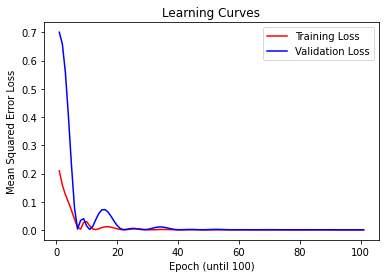

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

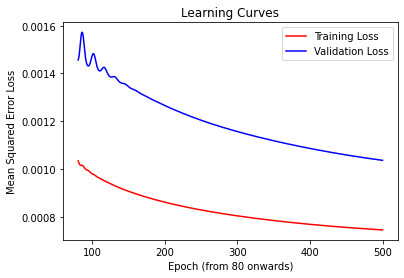

In [14]:
# define the GRU network

class GRU_network(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_probability):
        super(GRU_network, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout_probability)
        self.fullyConnected = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        hidden = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_()
        out, _ = self.gru(x, (hidden.detach())) # detach from computational graph
        out = self.fullyConnected(out[:, -1, :]) # obtain the output
        return out

# set the number of epochs
total_epochs = 500

# set the GRU network's hyperparameters
hidden_size = 32
num_layers = 1
dropout_probability = 0

# input and output dimensions are both 1 since we are only modelling one time series
input_size = 1
output_size = 1

# instantiate the network that will be trained
net = GRU_network(input_size=input_size, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers, dropout_probability=dropout_probability)
# define the loss, use mean squared error loss
criterion = torch.nn.MSELoss()
# define the optimiser, use Adam for adaptive learning rate
optimiser = torch.optim.Adam(net.parameters(), lr=0.01)

# training

# save the network to this path
PATH = './saved_net.pth'

train_vector = np.zeros(total_epochs)
val_vector = np.zeros(total_epochs)
epochs_vector = np.zeros(total_epochs)

min_validation_loss = float('inf')
epoch_of_min_val_loss = 1

for e in range(total_epochs):
    # train on training data
    net.train()
    y_train_pred = net(x_train)

    loss = criterion(y_train_pred, y_train)
    print("Epoch ", e+1, "Training MSE: ", loss.item())
    
    train_vector[e] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    # evaluate on validation data
    net.eval()
    y_val_pred = net(x_val)

    loss = criterion(y_val_pred, y_val)
    print("Epoch ", e+1, "Validation MSE: ", loss.item())

    val_vector[e] = loss.item()

    epochs_vector[e] = e+1

    # if there is a decrease in validation loss, save the network
    if val_vector[e] < min_validation_loss:
      min_validation_loss = val_vector[e]
      epoch_of_min_val_loss = e+1
      torch.save(net.state_dict(), PATH)

print('\nThe minimum validation loss is: ' + str(min_validation_loss) + ' which occurs at epoch: ' + str(epoch_of_min_val_loss) + '\n')
# plot the learning curves for the first 100 epochs
plt.figure()
plt.plot(epochs_vector[:101], train_vector[:101], 'r-', label="Training Loss")
plt.plot(epochs_vector[:101], val_vector[:101], 'b-', label="Validation Loss")
plt.xlabel("Epoch (until 100)")
plt.ylabel("Mean Squared Error Loss")
plt.title("Learning Curves")
plt.legend()
plt.savefig('figure1.png',format='png')
files.download('figure1.png')
plt.show()

# plot the learning curves for the epochs from 80 onwards
plt.figure()
plt.plot(epochs_vector[80:], train_vector[80:], 'r-', label="Training Loss")
plt.plot(epochs_vector[80:], val_vector[80:], 'b-', label="Validation Loss")
plt.xlabel("Epoch (from 80 onwards)")
plt.ylabel("Mean Squared Error Loss")
plt.title("Learning Curves")
plt.legend()
plt.savefig('figure2.png',format='png')
files.download('figure2.png')
plt.show()


Test MSE: 0.14977629482746124


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

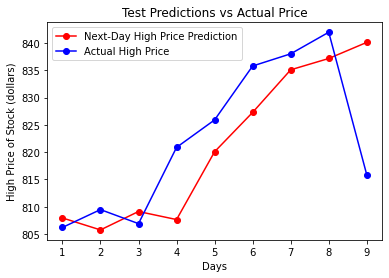

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

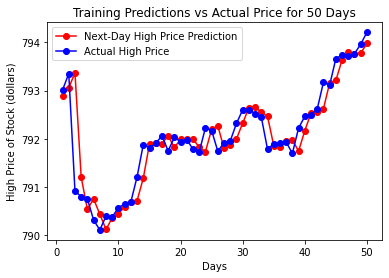

In [16]:
    # evaluate on test data
    net.eval()
    y_test_pred = net(x_test)
    loss = criterion(y_test_pred, y_test)
    test_loss = loss.item()

    # print out the mean square loss 
    print('Test MSE: ' + str(test_loss))

    # apply the inverse transform to recover the original price values
    test_predictions = scaler.inverse_transform(y_test_pred.detach().numpy())
    test_labels = scaler.inverse_transform(y_test.detach().numpy())

    days = np.array(list(range(1,len(test_labels)+1)))

    # plot the comparison between the predicted High price and the actual High price for all the next-day predictions possible in the test data set
    plt.figure()
    plt.plot(days, test_predictions, 'ro-', label="Next-Day High Price Prediction")
    plt.plot(days, test_labels, 'bo-', label="Actual High Price")
    plt.xlabel("Days")
    plt.ylabel("High Price of Stock (dollars)")
    plt.title("Test Predictions vs Actual Price")
    plt.legend()
    plt.savefig('figure3.png',format='png')
    files.download('figure3.png')
    plt.show()

   # plot the comparison between the predicted High price and the actual High price for the first 50 next-day predictions in the training data set 
    days = np.array(list(range(1,len(y_train_pred[:50])+1)))

    # apply the inverse transform to recover the original price values
    train_predictions = scaler.inverse_transform(y_train_pred.detach().numpy())
    train_labels = scaler.inverse_transform(y_train.detach().numpy())

    plt.figure()
    plt.plot(days, train_predictions[:50], 'ro-', label="Next-Day High Price Prediction")
    plt.plot(days, train_labels[:50], 'bo-', label="Actual High Price")
    plt.xlabel("Days")
    plt.ylabel("High Price of Stock (dollars)")
    plt.title("Training Predictions vs Actual Price for 50 Days")
    plt.legend()
    plt.savefig('figure4.png',format='png')
    files.download('figure4.png')
    plt.show()


